[View in Colaboratory](https://colab.research.google.com/github/sapt86/GitPrac/blob/master/05_svm_exercise.ipynb)

![banner](https://raw.githubusercontent.com/CBDRH-HDAT9500/public-files/master/images/HDAT9500Banner.png)

# Classification problems

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm               import *
from sklearn.datasets          import make_blobs
from sklearn.metrics           import *
from sklearn.preprocessing     import *
from sklearn.model_selection   import *
from sklearn.pipeline          import *

We have loaded several submodules of `sklearn`. To learn as you go: 

* The documentation of each method can be accessed by pressing the TAB button inside parenthesis, e.g. in `SVC()`.
* `sklearn` has more detailed documentation online, see e.g. <http://scikit-learn.org/stable/modules/svm.html>. 



## Maximum margin separating hyperplane

We start with the easiest example: consider 40 points of two classes in 2D, which are linearly separable: 

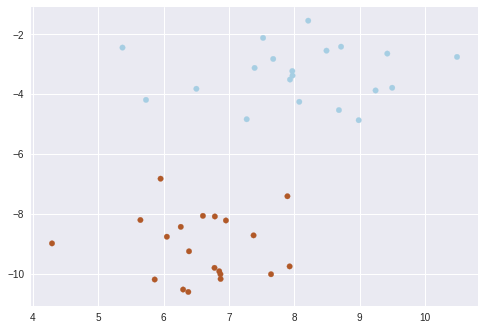

In [2]:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In 2D, a hyperplane is 1D (i.e. a line). Compute the line that separates the two classes and has a maximum margin! Steps: 

* Create an `SVC` object named `mySVM` with a linear kernel. 
* Call its `fit` method on the predictors `X` and `y`.

Reminder: to display inline help, move your cursor to the end of the next code chunk and press TAB:

In [0]:
mySVM = SVC(

---
<font color='blue'> START CODE HERE </font>

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<font color='blue'> END CODE HERE </font>

---

What can you do with the `mySVM` object? Move your cursor the end and hit TAB:

In [0]:
mySVM.

We are interested in the decision function here, let's plot it:

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mySVM.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

In this easy example, we don't need to tune much, because with the default values we already achieve perfect separation:

In [0]:
f"""The accuracy of our fitted SVM is {mySVM.score(X, y)}."""

'The accuracy of our fitted SVM is 1.0.'

For less straightforward examples, the penalty parameter `C` needs to be tuned, as well as the kernel parameters (if kernel is not `linear`).

> Try smaller and larger values for `C`, and interpret the results!



We can read off the intercept, coefficients and support vectors as follows: 

In [0]:
(beta, alpha, V) = (mySVM.intercept_, mySVM.dual_coef_, mySVM.support_vectors_)
(beta, alpha, V)

**Problem:** Express the decision function in terms of `beta`, `alpha` and `V`!

<font color='blue'> START CODE HERE </font>

In [0]:
def my_decision_function(X):
  """
  Input X: an array of shape (?, 2). 
  Returns: the as mySVM.decision_function(X), but you have to use (beta, alpha, V).
  Hints: 
  * On paper, write out the decision function
  * How do you rewrite it using matrices and transposes?
  * Use matrix product np.dot( , )
  >>> my_decision_function([[0,1]])
  array([-4.04939213])
  >>> my_decision_function([[1,0]])
  array([-3.46529996])
  """
    # Start code here
    
    # End code here

In [0]:
my_decision_function([[0,1]]), my_decision_function([[1,0]])

<font color='blue'> END CODE HERE </font>

## Applied to breast cancer data

In [0]:
# get data
df = pd.read_csv("https://storage.googleapis.com/hdat9500data/breast-cancer.csv")

In [0]:
# ignore this for now (shuffles rows)
df = df.reindex(np.random.permutation(df.index))

**Exercise:** Examine the columns by giving a list, where each entry contains 
1. the index
2. the datatype of the column and 
3. the name of the column

<font color='blue'> START CODE HERE </font>

In [0]:
# examine columns: 


<font color='blue'> END CODE HERE </font>

In [0]:
y = (df.diagnosis == 'M')
print(f"""There are {sum(y)} malignant and {sum(1-y)} benign cases.""")

**Exercise:** To get an idea of our predictors, a pair plot is a good idea. Apply 
`pd.plotting.scatter_matrix()`.

<font color='blue'> START CODE HERE </font>

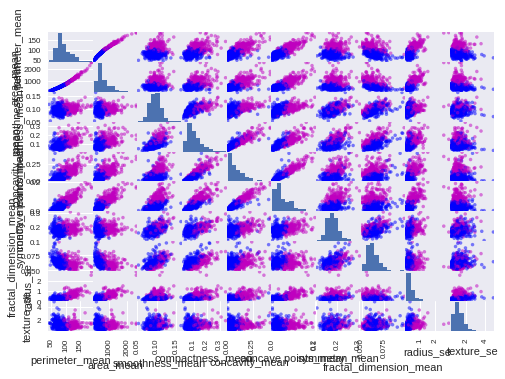

<font color='blue'> END CODE HERE </font>

We can separate the two classes almost by eye, so we can expect a classifier should give a good result.

In [0]:
# split into train and test set. Since we have shuffled the rows in the beginning, 
# we may take contingent rows
num_train = int(0.75 * len(y))
X_train = X.iloc[:num_train]
X_test  = X.iloc[num_train:]
y_train = y[:num_train]
y_test  = y[num_train:]

**Exercise:** use `StandardScaler()` from the submodule `preprocessing` to scale the training data.

<font color='blue'> START CODE HERE </font>

<font color='blue'> END CODE HERE </font>

**Exercise:** 

1. Fit a support vector classifier `SVC()` to the now scaled training data. Make classifier compute probabilities. 
2. Transform the test data with the same scaling transformation as the train data.
3. Compute
    * the predictions `y_pred` on the test data, according to the decision function
    * the class probabilities `y_score` on the test data.
4. Calculate
    * the confusion matrix for your predictions
    * plot the ROC curve and compute the AUC

<font color='blue'> START CODE HERE </font>

<font color='blue'> END CODE HERE </font>

## Tuning the hyperparameters: grid search

**Exercise:** Again split the data into a training and test set, but this time using `train_test_split()` from the submodule `preprocessing`:

<font color='blue'> START CODE HERE </font>

<font color='blue'> END CODE HERE </font>

**Exercise:** 
1. Using `Pipeline()`, create an estimator which automatically transforms the input data and fits a SVC.
2. Train it on the training data.
3. Evaluate it on the test data.

<font color='blue'> START CODE HERE </font>

<font color='blue'> END CODE HERE </font>

Next we want to systematically try different parameter settings for our estimator. Use `GridSearchCV()` to perform 5-fold cross-validation for the following parameters: 
* Try the kernels `linear`, `rbf` and `poly`
* Try values 1, 10, 100, 1000 for `C`
* Try values of `gamma` which are smaller or larger than the default

Pick a useful score to be maximised from [here](http://scikit-learn.org/stable/modules/model_evaluation.html).

<font color='blue'> START CODE HERE </font>

<font color='blue'> END CODE HERE </font>

## Tuning the hyperparameters: random search

Usually, a better search strategy is **random search**, which 
1. specifies a distribution for each parameter
2. repeatedly draws a set of parameters and evaluates this draw using CV
3. stops after a previously decided number of iterations. 

**Exercise:** Use `RandomizedSearchCV` with suitable exponential distributions (`scipy.stats.expon()`) for `C` and `gamma`. 
Choose a kernel at random. 

<font color='blue'> START CODE HERE </font>

In [0]:
from scipy.stats import expon

<font color='blue'> END CODE HERE </font>

# Anomaly detection via One-Class-SVM

The breast cancer dataset is (suspiciously?) well behaved. In particular, there are enough malignant cases to train a classifier on. 

Suppose that we have a dataset in which one class (e.g. malignant) is so underrepresented that there just isn't enough data to fit a two-class classifier. 

In **anomaly detection** one approach is as follows: 
1. Learn the distribution of the normal cases.
2. For newly incoming data, compare how well these fit with the learnt distribution. 
3. Rank the new data in decreasing order of the quality of fit with the learnt distribution.

The result is an algorithm which proposes e.g. to a doctor the measurements which are least likely to be normal. If datasets are large but anomalies are very few, this could save the doctor a lot of time. 

Other applications of this approach could be
* credit card fraud detection: for each fraudulent transaction, there are thousands of valid transactions
* directing the attention of ASIC case officers browsing suspicious matter reports
* ... 

We will use [`OneClassSVM()`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) from sklearn. 

**Exercise:** 
1. Extract all the predictors for the benign cases into a matrix `X_B` and for the malignant cases into a matrix `X_M`. 
2. Split the benign cases into an 80% training and 20% testing set. 

<font color='blue'> START CODE HERE </font>

<font color='blue'> END CODE HERE </font>

**Exercise:**
1. Using `Pipeline()`, create an "estimator" for the learnt distribution, which 
    * standardises the input
    * fits a `OneClassSVM()` such that the decision boundary contains the smallest volume containing the most likely 95% of data points. 
2. Fit this estimator to the training data. 

<font color='blue'> START CODE HERE </font>

<font color='blue'> END CODE HERE </font>

Confirm that your anomaly detector indeed classifies approximately 95% of the training data as "normal". 
How does it classify the test data? 

<font color='blue'> START CODE HERE </font>

On the training data:

0.0456140350877193

On the test data:

0.041666666666666664

<font color='blue'> END CODE HERE </font>

Pool the test data and the malignant data into `X_new`. 
Then output the 10 observations from `X_new` which are most likely to be outliers (and thus malignant), and compare with their actual labels.

Steps: 
1. Make a list in which each item contains the score of the anomaly detector and the label for the new data.
2. Order this list along the first entry. 

<font color='blue'> START CODE HERE </font>

<font color='blue'> END CODE HERE </font>